In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# May 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

### 1. Loading the Data Set

In [3]:
from sklearn.datasets import fetch_20newsgroups

train_set = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test_set = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [4]:
X_train, y_train = train_set.data, train_set.target
X_test, y_test = test_set.data, test_set.target

### 2. Data Exploration

In [5]:
print('Number of training documents:', len(X_train))
print('Number of test documents:', len(X_test))

Number of training documents: 11314
Number of test documents: 7532


In [6]:
categories = train_set.target_names
print(categories)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [7]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377], dtype=int64))

In [8]:
print(X_train[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [9]:
print('Document label:', categories[y_train[0]])

Document label: rec.autos


### 3. Text Preprocessing and Vectorization

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

In [11]:
print(X_train_vec.shape)

(11314, 101631)


In [12]:
vocab = vectorizer.get_feature_names_out()
print(vocab[:10])

['00' '000' '0000' '00000' '000000' '00000000' '0000000004' '00000000b'
 '00000001' '00000001b']


In [13]:
print(X_train_vec.nnz / X_train_vec.shape[0])

97.54525366802191


In [14]:
import pandas as pd

df = pd.DataFrame(X_train_vec[:5].toarray(), columns=vocab)
df

,00,000,0000,00000,000000,00000000,0000000004,00000000b,00000001,00000001b,...,zznkzz,zznp,zzrk,zzy_3w,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4. Building the Model

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB(alpha=0.01))
])
model.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', MultinomialNB(alpha=0.01))])

### 5. Evaluating the model

In [16]:
print(f'Accuracy (train): {model.score(X_train, y_train):.4f}')
print(f'Accuracy (test): {model.score(X_test, y_test):.4f}')

Accuracy (train): 0.9589
Accuracy (test): 0.7002


In [17]:
from sklearn.model_selection import train_test_split

# Combine the original training and test data
X_combined = X_train + X_test
y_combined = np.concatenate([y_train, y_test])

# Perform a random split into new training and test sets 
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(
    X_combined, y_combined, test_size=0.4, random_state=42
)

# Fit the model on the new training data
model.fit(X_new_train, y_new_train)

# Evaluate the model on the new data sets
train_accuracy = model.score(X_new_train, y_new_train)
test_accuracy = model.score(X_new_test, y_new_test)

print(f'Accuracy (new train): {train_accuracy:.4f}')
print(f'Accuracy (new test): {test_accuracy:.4f}')

Accuracy (new train): 0.9563
Accuracy (new test): 0.7506


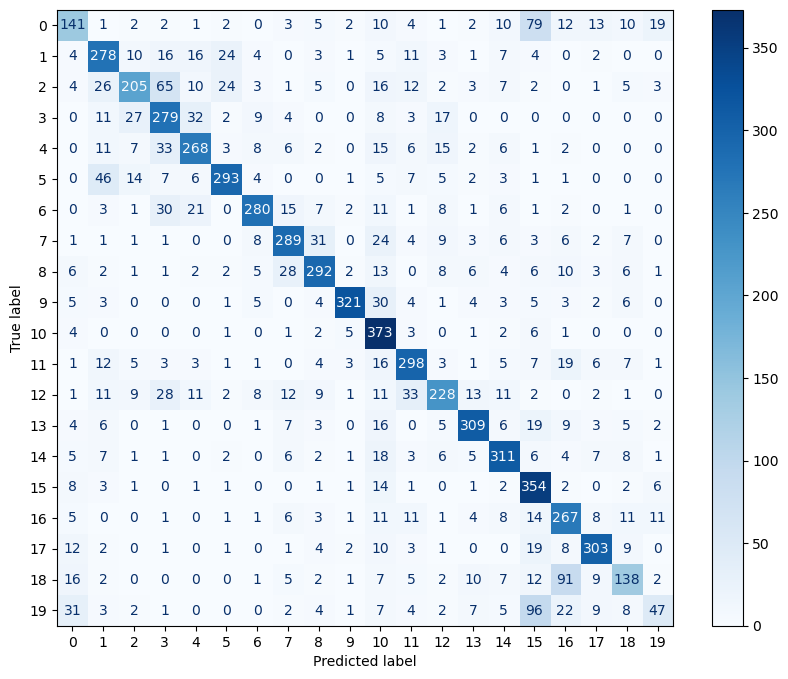

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.fit(X_train, y_train)  # Refit the model on the original training data
y_test_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues')

plt.savefig('figures/mnb_confusion_matrix.pdf', bbox_inches='tight')

### 6. Benchmarking

In [19]:
import time
from sklearn.pipeline import make_pipeline

def evaluate_classifiers(classifiers, names, X_train, y_train, X_test, y_test, verbose=True):
    evaluations = [] # Stores the evaluation results

    # Iterate over all classifiers
    for clf, name in zip(classifiers, names):        
        start_time = time.time()
        
        # Define a pipeline with TF-IDF vectorizer and the given classifier
        model = make_pipeline(TfidfVectorizer(), clf)
        model.fit(X_train, y_train)
        
        # Calculate the training time and accuracy on the test set
        training_time = time.time() - start_time       
        test_accuracy = model.score(X_test, y_test)
        
        # Store the results in a dictionary
        evaluation = {
            'classifier': name,
            'training_time': training_time,
            'test_accuracy': test_accuracy
        }        
        if verbose:
            print(evaluation)       
        evaluations.append(evaluation)   
    return evaluations

In [20]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

classifiers = [MultinomialNB(alpha=0.01),
               BernoulliNB(alpha=0.01),               
               LogisticRegression(random_state=42), 
               KNeighborsClassifier(n_neighbors=10), 
               RandomForestClassifier(random_state=42),                
               LinearSVC(random_state=42)]
names = ['Multinomial NB', 'Bernoulli NB', 'Logistic Regression', 'KNN', 'Random Forests', 'Linear SVC']

evaluations = evaluate_classifiers(classifiers, names, X_train, y_train, X_test, y_test)

{'classifier': 'Multinomial NB', 'training_time': 1.7617473602294922, 'test_accuracy': 0.7002124269782263}
{'classifier': 'Bernoulli NB', 'training_time': 1.7610318660736084, 'test_accuracy': 0.5568242166755177}
{'classifier': 'Logistic Regression', 'training_time': 22.756373643875122, 'test_accuracy': 0.6744556558682953}
{'classifier': 'KNN', 'training_time': 1.6397347450256348, 'test_accuracy': 0.0768720127456187}
{'classifier': 'Random Forests', 'training_time': 82.4481270313263, 'test_accuracy': 0.5965215082315454}
{'classifier': 'Linear SVC', 'training_time': 3.023529291152954, 'test_accuracy': 0.6919808815719597}


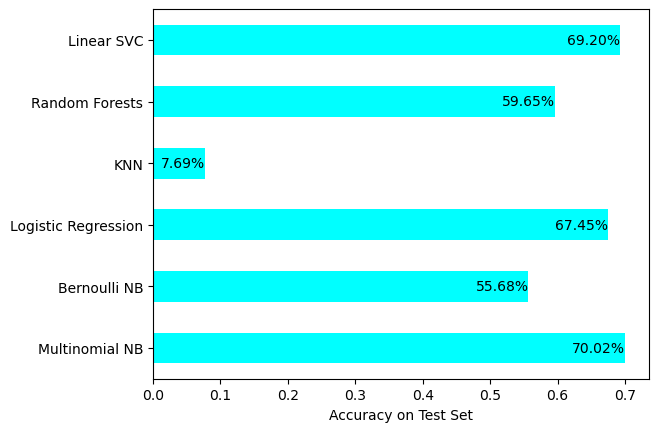

In [21]:
df = pd.DataFrame(evaluations).set_index('classifier')

df['test_accuracy'].plot.barh(color='cyan')
plt.xlabel('Accuracy on Test Set')
plt.ylabel('') 
for index, value in enumerate(df['test_accuracy']):
    plt.text(value, index, f'{value * 100:.2f}%', va='center', ha='right')

plt.savefig('figures/document_classification_accuracy.pdf', bbox_inches='tight')

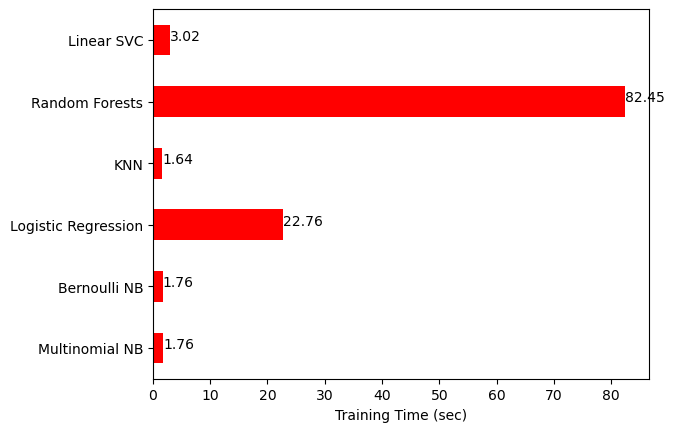

In [22]:
df['training_time'].plot.barh(color='red')
plt.xlabel('Training Time (sec)')
plt.ylabel('') 
for index, value in enumerate(df['training_time']):
    plt.text(value, index, f'{value:.2f}')
    
plt.savefig('figures/document_classification_training_time.pdf', bbox_inches='tight')

### 7. Find the Most Informative Features

In [23]:
def show_top_n_features(pipeline, categories, n):
    # Retrieve the array of feature names from the vectorizer
    feature_names = pipeline.named_steps['vect'].get_feature_names_out()
    
    # Retrieve the classifier from the pipeline
    clf = pipeline.named_steps['clf']
    
    for i, category in enumerate(categories):    
        # Get indices of top n features sorted by importance in descending order
        top_n = np.argsort(clf.feature_log_prob_[i])[-n:][::-1]
        
        # Fetch the feature names using the indices and join them into one string
        print(f"{category}: {' '.join(feature_names[top_n])}")       

In [24]:
def show_top_n_discriminative_features(model, categories, n_features):
    # Get the feature names from the vectorizer
    feature_names = model.named_steps['vect'].get_feature_names_out()

    # Retrieve the classifier from the pipeline
    clf = model.named_steps['clf']
    
    # Get the log probabilities for each class
    log_prob = clf.feature_log_prob_

    for i, category in enumerate(categories):
        # Compute the average log-probabilities across all other classes
        avg_log_prob_other_classes = np.mean(np.delete(log_prob, i, axis=0), axis=0)
        
        # Compute discriminative scores as the deviation from the average
        discriminative_scores = log_prob[i] - avg_log_prob_other_classes

        # Get indices of the top-n most discriminative features
        top_n = np.argsort(discriminative_scores)[-n_features:][::-1]

        # Print the top-n feature names for the current category
        print(f"{category}: {' '.join(feature_names[top_n])}")

In [25]:
show_top_n_discriminative_features(model, categories, n_features=5)

alt.atheism: atheism atheists islam bobbe beauchaine
comp.graphics: cview pov tiff polygon 3d
comp.os.ms-windows.misc: ax cica ini win3 w4wg
comp.sys.ibm.pc.hardware: ide scsi vlb irq controller
comp.sys.mac.hardware: quadra centris lciii c650 duo
comp.windows.x: widget motif x11r5 xterm xlib
misc.forsale: obo forsale shipping sega lens
rec.autos: toyota autos honda convertible wagon
rec.motorcycles: bike bikes motorcycle helmet harley
rec.sport.baseball: pitching braves alomar phillies sox
rec.sport.hockey: nhl hockey leafs playoffs espn
sci.crypt: encryption nsa clipper escrow crypto
sci.electronics: amp circuit 8051 voltage transformer
sci.med: geb chastity n3jxp dsl cadre
sci.space: orbit lunar spacecraft shuttle moon
soc.religion.christian: jesus christians christianity christ scripture
talk.politics.guns: firearms firearm feustel jmd batf
talk.politics.mideast: armenians armenian israeli israel arab
talk.politics.misc: stephanopoulos deane libertarians garrett homosexual
talk.rel